# Single Band Statistics via Sentinel-Hub Statistical API

In [1]:
import os
import yaml
from munch import munchify

### _Setup configuration and environment_

In [2]:
# define repo name and get root working directory
repo = 'statistical'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]

# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-2' )

In [3]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-2' )
cfg_path

'C:\\Users\\crwil\\Documents\\GitHub\\sentinelhub\\apis\\statistical\\cfg\\sentinel-2'

In [4]:
# get pathname to configuration file
cfg_file = os.path.join( cfg_path, 's2-stats.yml' )

In [5]:
# print contents of configuration file
with open( cfg_file ) as f:
    print ( f.read() )

request:
    evalscript: |       
                //VERSION=3
                function setup() {
                    return {
                        input: [{
                            bands: [
                                "B02",
                                "B03",
                                "B04",
                                "B05",
                                "B06",
                                "B07",
                                "B08",
                                "B8A",
                                "B11",
                                "B12",                                
                                "SCL",
                                "dataMask"
                            ]
                        }],
                        output: [
                        {
                            id: "stats",
                            bands: [ "band_B02", "band_B03", "band_B04", "band_B05", "band_B06", "band_B07", "band_B08", "band_B8A", "band_B

In [6]:
# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )
config

Munch({'request': Munch({'evalscript': '//VERSION=3\nfunction setup() {\n    return {\n        input: [{\n            bands: [\n                "B02",\n                "B03",\n                "B04",\n                "B05",\n                "B06",\n                "B07",\n                "B08",\n                "B8A",\n                "B11",\n                "B12",                                \n                "SCL",\n                "dataMask"\n            ]\n        }],\n        output: [\n        {\n            id: "stats",\n            bands: [ "band_B02", "band_B03", "band_B04", "band_B05", "band_B06", "band_B07", "band_B08", "band_B8A", "band_B11", "band_B12" ],\n            sampleType: "FLOAT32"                            \n        },\n        {\n            id: "dataMask",\n            bands: 1\n        }]\n    }\n}\nfunction evaluatePixel(samples) {\n    var qaMask = 0\n    if ( samples.SCL == 4 || samples.SCL == 5 ) {\n        qaMask = 1\n    }\n    return {\n        stats:

### _Replicate use case results taken from Sentinel-Hub documentation_

In [7]:
from sentinelhub import CRS

# define min and max latlons
coords = 414315, 4958219, 414859, 4958819
crs = CRS( 32633 )

resolution = 10

In [8]:
# define aggregation timeframe
from datetime import datetime
timeframe = { 'start' : datetime.strptime('2020-07-04', '%Y-%m-%d'), 
              'end' : datetime.strptime('2020-07-05', '%Y-%m-%d') }

In [9]:
# create instance of shclient class
from statisticalapi import Client
client = Client( config )

In [10]:
# get utm bbox
bbox = client.getBoundingBox( coords, src_crs=crs )
print ( bbox, bbox.crs.value )

414315.0,4958219.0,414859.0,4958819.0 32633


In [11]:
# submit request
response = client.getStatistics( [ timeframe ], resolution=resolution, bbox=bbox )

In [12]:
response._dfs[ 0 ]

,id


### _Repeat Statistical API request with coarser pixel resolution_

In [13]:
# submit request
response = client.getStatistics( [ timeframe ], resolution=50, bbox=bbox )

In [14]:
response._dfs[ 0 ]

,id


### _Repeat Statistical API request for summer of 2020_

In [15]:
# define aggregation timeframe
timeframe = { 'start' : datetime.strptime('2020-06-01', '%Y-%m-%d'), 
              'end' : datetime.strptime('2020-08-31', '%Y-%m-%d') }

In [16]:
# submit request
response = client.getStatistics( [ timeframe ], resolution=10, bbox=bbox, interval="P1D" )

In [17]:
response._dfs[ 0 ]

,id,interval_from,interval_to,stats_band_B02_min,stats_band_B02_max,stats_band_B02_mean,stats_band_B02_stDev,stats_band_B02_sampleCount,stats_band_B02_noDataCount,stats_band_B03_min,...,stats_band_B11_mean,stats_band_B11_stDev,stats_band_B11_sampleCount,stats_band_B11_noDataCount,stats_band_B12_min,stats_band_B12_max,stats_band_B12_mean,stats_band_B12_stDev,stats_band_B12_sampleCount,stats_band_B12_noDataCount
0,geom_0,2020-06-14,2020-06-15,0.0221,0.3352,0.067357,0.051811,3240,2092,0.0311,...,0.203818,0.119096,3240,2092,0.0331,0.4136,0.124354,0.088536,3240,2092
1,geom_0,2020-06-19,2020-06-20,0.0181,0.2678,0.055043,0.046283,3240,2012,0.0225,...,0.166524,0.089143,3240,2012,0.0339,0.3561,0.106155,0.075101,3240,2012
2,geom_0,2020-06-24,2020-06-25,0.0390,0.3194,0.079207,0.045742,3240,1864,0.0495,...,0.234572,0.092987,3240,1864,0.0560,0.3979,0.149515,0.082665,3240,1864
3,geom_0,2020-06-29,2020-06-30,0.0287,0.2872,0.071173,0.049189,3240,1876,0.0403,...,0.232758,0.095287,3240,1876,0.0585,0.3954,0.154693,0.088359,3240,1876
4,geom_0,2020-07-09,2020-07-10,0.0235,0.2976,0.067295,0.050958,3240,1888,0.0360,...,0.231512,0.096053,3240,1888,0.0531,0.3966,0.152971,0.088426,3240,1888
5,geom_0,2020-07-14,2020-07-15,0.0214,0.2886,0.067168,0.051647,3240,1880,0.0326,...,0.227161,0.092146,3240,1880,0.0547,0.3776,0.144304,0.081156,3240,1880
6,geom_0,2020-07-19,2020-07-20,0.0266,0.2896,0.071433,0.051945,3240,1888,0.0375,...,0.232887,0.098666,3240,1888,0.0492,0.3993,0.152588,0.089228,3240,1888
7,geom_0,2020-07-29,2020-07-30,0.0430,0.2404,0.077339,0.041453,3240,1908,0.0506,...,0.224644,0.094975,3240,1908,0.0488,0.3834,0.149989,0.088437,3240,1908
8,geom_0,2020-08-08,2020-08-09,0.0277,0.2800,0.068528,0.047713,3240,1936,0.0378,...,0.219947,0.095464,3240,1936,0.0459,0.3949,0.144930,0.086822,3240,1936
9,geom_0,2020-08-13,2020-08-14,0.0385,0.2752,0.073821,0.041825,3240,1916,0.0492,...,0.216661,0.090510,3240,1916,0.0490,0.3727,0.138814,0.080948,3240,1916


<AxesSubplot:xlabel='interval_from'>

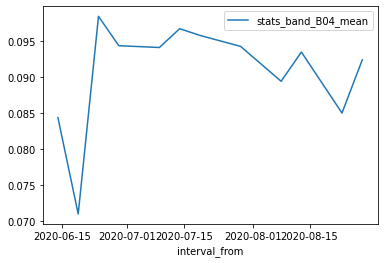

In [18]:
response._dfs[ 0 ].plot( 'interval_from', 'stats_band_B04_mean' )